In [1]:
# NO CODE

from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

## Exponential Approximations ##

Many probabilities are products or powers of fractions. To get a rough sense of the size of such a chance, it is often a good idea to take its logarithm and try to approximate that. This leads to an *exponential approximation* for the chance.

An example will help us see how this works.

### Bootstrap ###

A *bootstrap* sample is a sample of size $n$ drawn at random with replacement from an original sample of $n$ individuals. Because the sample is drawn with replacement, some individuals may be drawn more than once and some not at all.

Fix an individual in the original sample. For clarity, let's call that individual Special. What is the chance that Special appears at least once in the bootstrap sample?

As before, we will use the complement:

$$
P(\text{Special appears at least once}) ~ = ~ 1 - P(\text{Special does not appear})
$$

For Special *not* to appear, every draw must result in an individual who is not Special. By the independence of the draws,

$$
P(\text{Special does not appear}) ~ = ~ \big{(} \frac{n-1}{n} \big{)}^n
$$

If the numerical value of $n$ is known, then we can just calculate the answer numerically. But can we get a rough sense of how big this chance is when $n$ is large?

To figure this out, notice that when $n$ is large, the chance is a number close to 1 that has been raised to a large power. Let's take the $\log$ of the chance and see what we get.

$$
\begin{align*}
& \log(P(\text{Special does not appear})) \\
& = ~ n \log \big{(} \frac{n-1}{n} \big{)} \\
& = ~ n \log \big{(} 1 - \frac{1}{n} \big{)}
\end{align*}
$$

Let's see what we can say about the rough size of $\log\big{(} 1 - \frac{1}{n} \big{)}$ when $n$ is large. For this we will examine the graph of the function $y = \log(x)$ for values of $x$ that are close to 1.

### Log of a Number Close to 1 ###

The blue curve in the figure below is the graph of the function $y = \log(x)$ for values of $x$ near 1. The graph crosses the horizontal axis at $x = 1$ because $\log(1) = 0$.

The red dashed line is the graph of the $45^\circ$ line at the point $(1, 0)$. The line is the tangent to the curve $y = \log(x)$ at the point $x = 1$. That is because the slope of the tangent line at $x$ is given by

$$
\frac{d}{dx}\log(x) ~ = ~ \frac{1}{x} ~ = ~ 1 ~~ \text{ if } x = 1
$$

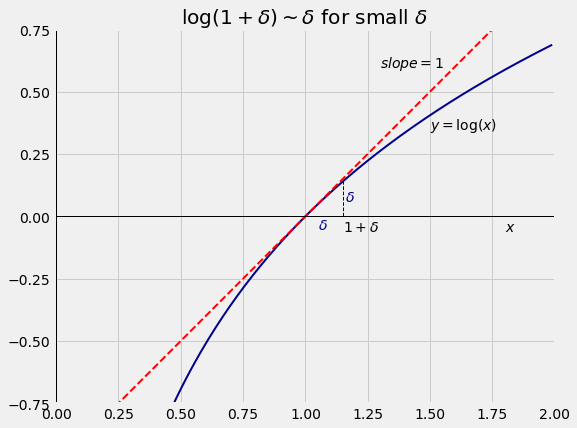

In [3]:
# NO CODE

x = np.arange(0.05, 2, 0.01)
y = np.log(x)
delta = 0.15
plt.figure(figsize=(8, 8))
plt.axes().set_aspect(1)
plt.plot(x, y, lw=2, color='darkblue')
plt.plot(x, x-1, lw=2, color='red', linestyle='dashed')
plt.plot([1+delta, 1+delta], [0, np.log(1+delta)], lw = 1, color='darkblue', linestyle='dashed')
plt.plot([1, 1+delta], [0, 0], lw=1, color='darkblue')
plt.text(1.15, -0.06, '$1+\delta$')
plt.text(1.05, -0.05, '$\delta$', color='darkblue')
plt.text(1.16, 0.06, '$\delta$', color='darkblue')
plt.text(1.5, 0.35, '$y = \log(x)$')
plt.text(1.3, 0.6, '$slope = 1$')
plt.text(1.8, -0.06, '$x$')
plt.plot([0, 2], [0, 0], color='k', lw=1)
plt.plot([0, 0], [-0.75, 0.75], color='k', lw=1)
plt.ylim(-0.75, 0.75)
plt.yticks(np.arange(-0.75, 0.76, 0.25))
plt.xlim(-0.01, 2)
plt.title('$\log(1+\delta ) \sim \delta$ for small $\delta$');

For a small positive number $\delta$, consider the point $x = 1+\delta$.

- The point is at a distance of $\delta$ away from $x = 1$.
- $\log(1+\delta )$ is the height of the blue curve at $x = 1+\delta$.
- Because $\delta$ is small, the tangent line $y = x$ is very close to the curve $y = \log(x)$ at the point $x = 1+\delta$.
- So the three points $(1, 0)$, $(1+\delta, 0)$, and $(1+\delta, \log(1+\delta))$ essentially form a $45^\circ$-$90^\circ$-$45^\circ$ triangle.
- The two legs of that triangle are equal, so $\log(1+\delta) \approx \delta$.

We will use this approximation repeatedly:

$$
\log(1 + \delta) ~ \approx ~ \delta ~~~~~ \text{ for small } \delta
$$

A glance at the graphs above should convince you that the approximation is true regardless of whether $\delta$ is positive or negative, as long as it is small.

### Exponential Approximation in the Bootstrap ###
Apply this approximation in our earlier calculation:

$$
\begin{align*}
& \log(P(\text{Special does not appear})) \\
& = ~ n \log \big{(} 1 - \frac{1}{n} \big{)} \\
& \approx ~ n \big{(} - \frac{1}{n} \big{)} ~~~~~ \text{when } n \text{ is large} \\
& = ~ -1
\end{align*}
$$

Now undo the $\log$ by exponentiation.

$$
\log(P(\text{Special does not appear})) ~ \approx ~ -1 ~~~~~ \text{when } n \text{ is large}
$$

implies

$$
P(\text{Special does not appear}) ~ \approx ~ e^{-1} ~~~~~ \text{when } n \text{ is large}
$$

and so

$$
P(\text{Special appears at least once}) ~ \approx 1 - e^{-1} ~~~~~ \text{when } n \text{ is large}
$$

The numerical value of this chance is about 63%. Notice that you don't need to know the value of $n$. You just need to know that it is large.

In [2]:
1 - (1 / np.e)

0.6321205588285577

### Rare Events ###

The example above is a special case of a situation in which a data scientist is studying how many times a rare event occurs. When $n$ is large, Special being picked on a single draw can be thought of as a rare event because its chance is $1/n$ which is small. 

On any particular draw, we aren't expecting Special to be picked. But the number of draws is $n$, which is large. This makes it likely that Special is picked at least once, as we have seen.

In general, suppose we have $n$ i.i.d. success/failure trials where $n$ is large and the probability $p$ of success on a single trial is small.

Roughly, you expect a proportion $p$ of the trials to be successes. So you expect to get about $np$ successes in all. We will make this calculation precise in the next chapter. For now, denote $np$ by $\mu$.

What is the chance of getting no successes?

The exact answer is straightforward:

$$
P(\text{no successes}) ~ = ~ (1-p)^n
$$

To get a sense of the size of this chance, let's approximate it.

$$
\begin{align*}
\log(P(\text{no successes}) ~ &= ~ n\log(1-p) \\
&\approx ~ n(-p) ~~~~ \text{because } p \text{ is small} \\
&= -\mu
\end{align*}
$$

So $P(\text{no successes}) ~ \approx ~ e^{-\mu}$ when $p$ is small.

Thus if you run 1000 i.i.d. trials with chance 2/1000 of success on each trial, then the chance of getting no successes is approximately $e^{-2} \approx 13.5\%$. The cell below shows the exact chance and the approximation.

In [6]:
# exact chance and exponential approximation

(1 - 2/1000) ** 1000, np.e**(-2)

(0.13506452244668338, 0.1353352832366127)

The approximation depends only on $\mu$, not on the individual values of $n$ and $p$. So suppose you run 5000 trials with chance 2/5000 of success on each trial. Then $\mu = 2$ as above. The chance of getting no successes is pretty much the same as above, and the exponential approximation is closer to the exact chance than it was above.

In [7]:
# exact chance and exponential approximation

(1 - 2/5000) ** 5000, np.e**(-2)

(0.13528114551440706, 0.1353352832366127)

The approximation helps us understand how the chance behaves, without the need to calculate its exact value. In the next section you will see how this approximation becomes the foundation of a new distribution.